In [1]:
# Домашнее задание №2: bonus по курсу "Машинное обучение"
# Выполнила Мирейко Наталья
% matplotlib inline

import csv
import numpy as np
from numpy.linalg import inv
from __future__ import division
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

data_x = []
data_y = []
with open('basketball.csv', 'rb') as csv_file:
    basketball_reader = csv.reader(csv_file, delimiter=',', quotechar='|')
    next(basketball_reader, None)
    for row in basketball_reader:
        data_x.append([row[0], row[1], row[2], row[3]])
        data_y.append([row[4]])

X = np.array(data_x, dtype=float).transpose()
Y = np.array(data_y, dtype=float)

# Стандартизация данных

# Это запоминаем, чтобы была возможность восстановить реальные значения
x_mean = X.mean(axis=1)
x_std = np.std(X, axis=1)
y_mean = np.mean(Y)
y_std = np.std(Y)
X = (X - np.mean(X, axis=1)[:, None]) / np.std(X, axis=1)[:, None]
Y = (Y - np.mean(Y)) / np.std(Y)

In [2]:
def ridge_regression(X, Y, parameter):
    return inv(X.dot(X.transpose()) + (parameter*np.identity(X.shape[0]))).dot(X).dot(Y)

In [3]:
def calculate_mse(X, Y, W):
    sum = 0
    for index, x in enumerate(X.transpose()):
        sum += pow(((x * x_std + x_mean).dot(W) - (Y[index][0] * y_std + y_mean)).item(), 2)
    return sum / Y.shape[0]

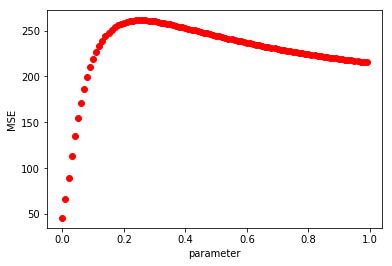

In [3]:
plt.xlabel('parameter')
plt.ylabel('MSE')

for parameter in xrange(0, 100, 1):
    plt.plot(parameter/100, calculate_mse(X, Y, ridge_regression(X, Y, parameter)), 'ro')    
plt.show()

In [5]:
# Используем алгоритм, который описан в https://en.wikipedia.org/wiki/Least_absolute_deviations
# То есть строим w = w0 + w1*x1+ .. + wm*xm

from scipy.optimize import linprog

training_set_size = X.transpose().__len__()
c = [0] * 5 + [1] * training_set_size
A = []

for index, x in enumerate(X.transpose()):
    a = np.empty(training_set_size)
    a.fill(0)
    a[index] = -1
    A.append(np.append([-1], (-1 * x)).tolist() + a.tolist())

for index, x in enumerate(X.transpose()):
    a = np.empty(training_set_size)
    a.fill(0)
    a[index] = -1
    A.append(np.append([1], x).tolist() + a.tolist())

b = (-1 * Y).tolist() + Y.tolist()

bounds = []
for x in range(5):
    bounds.append((None, None))
for x in range(training_set_size):
    bounds.append((0, None))

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds,
              options={'disp': False, 'bland': False, 'tol': 1e-12, 'maxiter': 10000})
error = 0

for index, x in enumerate(X.transpose()):
    error += abs((res.x[0] + (x * x_std + x_mean).dot(res.x[1:5])) - (Y[index] * y_std + y_mean).item())
print "Ошибка алгоритма: " + str(error / training_set_size)

Error of alghoritm: 4.94279496485
